In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import os
path=os.listdir(r'/content/drive/MyDrive/BrainTumor/Multi_Otsu/training')
classes={'glioma_tumor':0,'meningioma_tumor':1,'no_tumor':2,'pituitary_tumor':3}

In [94]:
#appending inputs into X and output, targets into Y.
import cv2
X=[]
Y=[]
for cls in classes:
    pth=(r'/content/drive/MyDrive/BrainTumor/Multi_Otsu/training/')+cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j, 0)
        img=cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])

In [95]:
np.unique(Y)

array([0, 1, 2, 3])

In [96]:
X=np.array(X)
Y=np.array(Y)

In [97]:
pd.Series(Y).value_counts()

0    846
3    827
1    822
2    394
dtype: int64

In [98]:
X.shape

(2889, 200, 200)

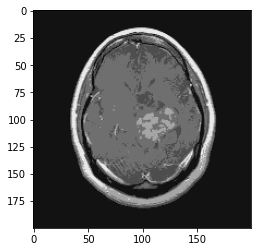

In [99]:
plt.imshow(X[0],cmap='gray')

In [100]:
X_updated=X.reshape(len(X),-1)
X_updated.shape

(2889, 40000)

In [101]:
xtrain,xtest,ytrain,ytest=train_test_split(X_updated,Y,random_state=10,test_size=.10)

In [102]:
xtrain.shape,xtest.shape

((2600, 40000), (289, 40000))

In [103]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

246 1
243 1
0.9647058823529412 0.00392156862745098
0.9529411764705882 0.00392156862745098


In [104]:
from sklearn.decomposition import PCA

In [105]:
print(xtrain.shape,xtest.shape)

pca=PCA(.98)
#pca_train=pca.fit_transform(xtrain)
#pca_test=pca.transform(xtest)
pca_train=xtrain
pca_test=xtest

(2600, 40000) (289, 40000)


In [106]:
#print(pca_train.shape,pca_test.shape)
#print(pca.n_components_)
#print(pca.n_features)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [108]:
lg=LogisticRegression()
lg.fit(pca_train,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [109]:
sv=SVC()
sv.fit(pca_train,ytrain)

SVC()

In [110]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(pca_train,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [111]:
print("Training score:",lg.score(pca_train,ytrain))
print("Testing score:",lg.score(pca_test,ytest))

Training score: 1.0
Testing score: 0.7162629757785467


In [112]:
print("Training score:",sv.score(pca_train,ytrain))
print("Testing score:",sv.score(pca_test,ytest))

Training score: 0.9361538461538461
Testing score: 0.7301038062283737


In [113]:
print("Training score:",knn.score(pca_train,ytrain))
print("Testing score:",knn.score(pca_test,ytest))

Training score: 0.9238461538461539
Testing score: 0.8408304498269896


In [114]:
pred=sv.predict(pca_test)
#printing indexes of misclassifications
np.where(ytest!=pred)

(array([  4,   7,  13,  17,  23,  28,  29,  34,  37,  38,  43,  44,  46,
         51,  52,  55,  56,  63,  69,  72,  75,  81,  85,  86,  89,  96,
        102, 106, 112, 122, 123, 125, 130, 140, 150, 153, 162, 164, 165,
        166, 169, 172, 176, 177, 180, 182, 190, 191, 192, 194, 196, 197,
        203, 214, 215, 222, 223, 225, 226, 229, 230, 231, 240, 242, 244,
        252, 257, 258, 264, 267, 268, 269, 273, 276, 280, 283, 286, 288]),)

In [115]:
pred[6]

1

In [116]:
ytest[6]

1

In [117]:
#TEST MODEL

In [118]:
dec={0:'glioma_tumor',1:'meningioma_tumor',2:'no_tumor',3:'pituitary_tumor'}

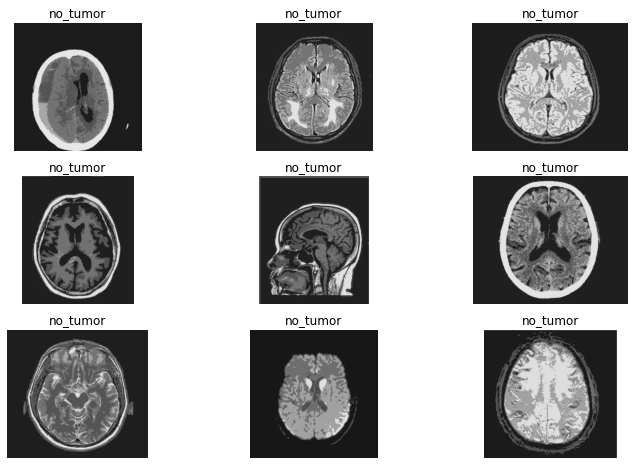

In [119]:
plt.figure(figsize=(12,8))
p=os.listdir(r'/content/drive/MyDrive/BrainTumor/Multi_Otsu/testing/')
c=1
for i in os.listdir(r'/content/drive/MyDrive/BrainTumor/Multi_Otsu/testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img=cv2.imread(r'/content/drive/MyDrive/BrainTumor/Multi_Otsu/testing/no_tumor/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1 

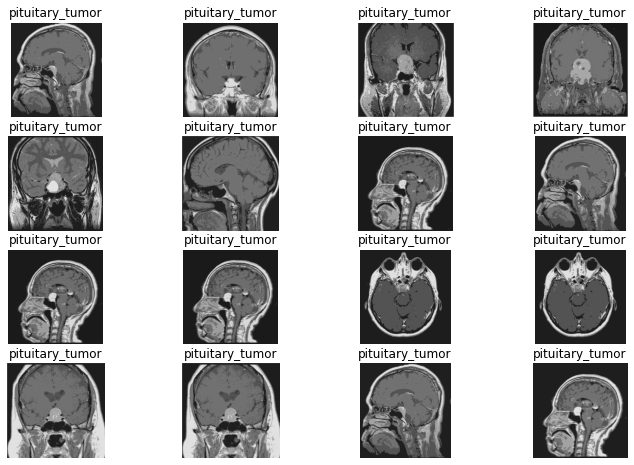

In [120]:
plt.figure(figsize=(12,8))
p=os.listdir(r'/content/drive/MyDrive/BrainTumor/Multi_Otsu/testing/')
c=1
for i in os.listdir(r'/content/drive/MyDrive/BrainTumor/Multi_Otsu/testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img=cv2.imread(r'/content/drive/MyDrive/BrainTumor/Multi_Otsu/testing/pituitary_tumor/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [121]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score

In [122]:
predicted_labels = sv.predict(xtest)
cnf_matrix = confusion_matrix(ytest, predicted_labels)
print(cnf_matrix)

[[55 15  0  4]
 [28 52  7  8]
 [ 3  9 20  0]
 [ 3  1  0 84]]


In [123]:
predicted_labels = knn.predict(xtest)
cnf_matrix = confusion_matrix(ytest, predicted_labels)
print(cnf_matrix)

[[66  7  0  1]
 [17 70  1  7]
 [ 9  1 19  3]
 [ 0  0  0 88]]


In [124]:
predicted_labels = lg.predict(xtest)
cnf_matrix = confusion_matrix(ytest, predicted_labels)
print(cnf_matrix)

[[51 21  1  1]
 [25 56  8  6]
 [ 5  8 18  1]
 [ 2  4  0 82]]


In [125]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingCVClassifier

In [130]:
scv=StackingCVClassifier(classifiers=[lg,knn,sv],meta_classifier=knn)
scv.fit(xtrain,ytrain)
scv_predicted = scv.predict(xtest)
scv_conf_matrix = confusion_matrix(ytest,scv_predicted)
scv_acc_score = accuracy_score(ytest, scv_predicted)
scv_f1_score = f1_score(ytest, scv_predicted,average='micro')

print("confusion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(ytest,scv_predicted))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


confusion matrix
[[59 13  1  1]
 [27 62  2  4]
 [ 6 12 14  0]
 [ 4  5  0 79]]


Accuracy of StackingCVClassifier: 74.0484429065744 

              precision    recall  f1-score   support

           0       0.61      0.80      0.69        74
           1       0.67      0.65      0.66        95
           2       0.82      0.44      0.57        32
           3       0.94      0.90      0.92        88

    accuracy                           0.74       289
   macro avg       0.76      0.70      0.71       289
weighted avg       0.76      0.74      0.74       289



In [131]:
cm = confusion_matrix(ytest, scv_predicted)
classes = ['Glioma','Meningioma','No tumor','Pituitary']

In [132]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')   

Confusion Matrix, without normalization
[[59 13  1  1]
 [27 62  2  4]
 [ 6 12 14  0]
 [ 4  5  0 79]]


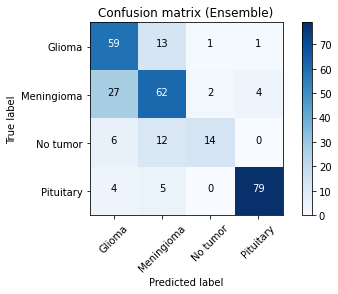

In [133]:
import itertools
plot=plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix (Ensemble)',
                          cmap=plt.cm.Blues)